<a href="https://colab.research.google.com/github/Anas321/Recommender_Books/blob/main/Recommender_for_Books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Recommendation System Classification

![](https://www.researchgate.net/profile/Dr_K_Saravanan/publication/316164728/figure/fig1/AS:483990101598208@1492403640588/Recommendation-techniques.png)


In [ ]:
from google.colab import drive, files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd 
import numpy as np 

In [ ]:
#cd drive/My\ Drive/Recommender_Books/

In [ ]:
#cd /content/drive/My Drive/Colab Notebooks/books dataset

In [ ]:
#files.upload()

In [ ]:
#book_tags= pd.read_csv('book_tags.csv')
book_tags= pd.read_csv('/content/drive/My Drive/Colab Notebooks/books dataset/book_tags.csv')
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [ ]:
#books= pd.read_csv('books.csv')
books= pd.read_csv('/content/drive/My Drive/Colab Notebooks/books dataset/books.csv')
books.head().T

,0,1,2,3,4
id,1,2,3,4,5
book_id,2767052,3,41865,2657,4671
best_book_id,2767052,3,41865,2657,4671
work_id,2792775,4640799,3212258,3275794,245494
books_count,272,491,226,487,1356
isbn,439023483,439554934,316015849,61120081,743273567
isbn13,9.78044e+12,9.78044e+12,9.78032e+12,9.78006e+12,9.78074e+12
authors,Suzanne Collins,"J.K. Rowling, Mary GrandPré",Stephenie Meyer,Harper Lee,F. Scott Fitzgerald
original_publication_year,2008,1997,2005,1960,1925
original_title,The Hunger Games,Harry Potter and the Philosopher's Stone,Twilight,To Kill a Mockingbird,The Great Gatsby


In [ ]:
books.columns

Index(['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url'],
      dtype='object')

In [ ]:
#ratings= pd.read_csv('ratings.csv')
ratings= pd.read_csv('/content/drive/My Drive/Colab Notebooks/books dataset/ratings.csv')
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [ ]:
ratings[ratings['user_id']==100]

,book_id,user_id,rating
570830,5730,100,4
570831,5730,100,4
613370,6160,100,4
673673,6772,100,5
883664,8946,100,5
931741,9460,100,4


In [ ]:
ratings.shape

(981756, 3)

In [ ]:
########## not useful#########
#user_book= pd.read_csv('to_read.csv')
user_book= pd.read_csv('/content/drive/My Drive/Colab Notebooks/books dataset/to_read.csv')
user_book.head()

,user_id,book_id
0,1,112
1,1,235
2,1,533
3,1,1198
4,1,1874


In [ ]:
########## not useful#########
#tagsdf= pd.read_csv('datasets_1938_3914_tags.csv')
tagsdf= pd.read_csv('/content/drive/My Drive/Colab Notebooks/books dataset/datasets_1938_3914_tags.csv')
tagsdf.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [ ]:
df = books[['id', 'book_id', 'best_book_id', 'authors', 'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5']]
# prendere valori unici di best_book_id e chiamarlo book_id, ma occhio ai ratings
#books count è il numero delle edizioni

In [ ]:
df.head().T

,0,1,2,3,4
id,1,2,3,4,5
book_id,2767052,3,41865,2657,4671
best_book_id,2767052,3,41865,2657,4671
authors,Suzanne Collins,"J.K. Rowling, Mary GrandPré",Stephenie Meyer,Harper Lee,F. Scott Fitzgerald
title,"The Hunger Games (The Hunger Games, #1)",Harry Potter and the Sorcerer's Stone (Harry P...,"Twilight (Twilight, #1)",To Kill a Mockingbird,The Great Gatsby
language_code,eng,eng,en-US,eng,eng
average_rating,4.34,4.44,3.57,4.25,3.89
ratings_count,4780653,4602479,3866839,3198671,2683664
work_ratings_count,4942365,4800065,3916824,3340896,2773745
work_text_reviews_count,155254,75867,95009,72586,51992


In [ ]:
min(df['ratings_count'])

2716

In [ ]:
C = df['average_rating'].mean()
print('average:', C)
#m= df['ratings_count'].quantile(0.9)
#print('90 quantile of counts: ', m)

average: 4.002191000000001


In [ ]:
df.sort_values('average_rating', ascending=False).head() # SORTED BY AVG RATING

,index,id,book_id,best_book_id,authors,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,new_authors,new_title,soup
3627,3627,3628,24812,24812,Bill Watterson,The Complete Calvin and Hobbes,eng,4.82,28900,29968,861,120,154,693,3117,25884,billwatterson,thecompletecalvinandhobbes,billwatterson thecompletecalvinandhobbes
3274,3274,3275,8,8,"J.K. Rowling, Mary GrandPré","Harry Potter Boxed Set, Books 1-5 (Harry Potte...",eng,4.77,33220,33424,156,317,233,978,3686,28210,"j.k.rowling,marygrandpré","harrypotterboxedset,books1-5(harrypotter,#1-5)","j.k.rowling,marygrandpré harrypotterboxedset,..."
861,861,862,17332218,17332218,Brandon Sanderson,"Words of Radiance (The Stormlight Archive, #2)",eng,4.77,73572,108176,7261,154,404,2653,18272,86693,brandonsanderson,"wordsofradiance(thestormlightarchive,#2)",brandonsanderson wordsofradiance(thestormligh...
8853,8853,8854,95602,95602,Francine Rivers,Mark of the Lion Trilogy,en-US,4.76,9081,9547,731,27,61,323,1363,7773,francinerivers,markoftheliontrilogy,francinerivers markoftheliontrilogy
7946,7946,7947,5031805,5031805,"Anonymous, Lane T. Dennis, Wayne A. Grudem",ESV Study Bible,eng,4.76,8953,10784,262,98,90,367,1152,9077,"anonymous,lanet.dennis,waynea.grudem",esvstudybible,"anonymous,lanet.dennis,waynea.grudem esvstudy..."


Text(0.5, 1.0, 'Most Rated Books')

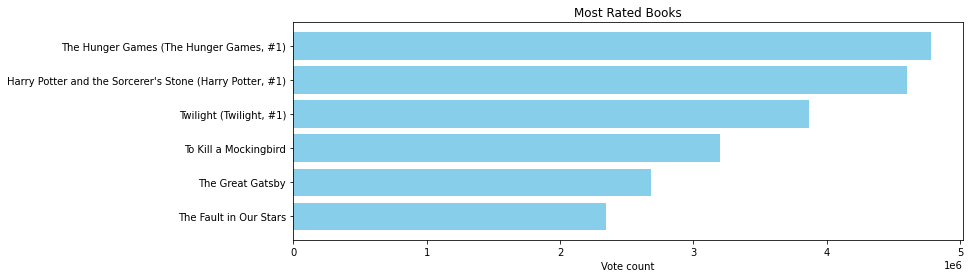

In [ ]:
pop= df.sort_values('ratings_count', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['ratings_count'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Vote count") 
plt.title("Most Rated Books")  

**Content Based Filtering**
In this recommender system the content of the book (overview, cast, crew, keyword, tagline etc) is used to find its similarity with other books. Then the books that are most likely to be similar are recommended.

In [ ]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
#df2['overview'] = df2['overview'].fillna('')
df['authors'] = df['authors'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['authors'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


(10000, 6175)

In [ ]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

In [ ]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    book_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[book_indices]
    #####let's talk bout this technical part for a few minutes, and make it simpler ####

In [ ]:
get_recommendations('The Complete Calvin and Hobbes') ##1 slide with these examples

1787         The Calvin and Hobbes Tenth Anniversary Book
3627                       The Complete Calvin and Hobbes
4482    It's a Magical World: A Calvin and Hobbes Coll...
5206    The Days Are Just Packed: A Calvin and Hobbes ...
5579               The Calvin and Hobbes Lazy Sunday Book
6360    There's Treasure Everywhere: A Calvin and Hobb...
6589    The Authoritative Calvin and Hobbes: A Calvin ...
6919                  The Indispensable Calvin and Hobbes
7253    Homicidal Psycho Jungle Cat: A Calvin and Hobb...
8977                          The Revenge of the Baby-Sat
Name: title, dtype: object

In [ ]:
get_recommendations('ESV Study Bible')

7547    Systematic Theology: An Introduction to Biblic...
463                        Holy Bible: King James Version
2081                           The Qur'an / القرآن الكريم
2235                Holy Bible: New International Version
4777             The Holy Bible: English Standard Version
9222                      La vida del Lazarillo de Tormes
3673    The Power of Intention: Learning to Co-create ...
7290    Change Your Thoughts - Change Your Life: Livin...
767                                        Shutter Island
1175                                         Mystic River
Name: title, dtype: object

In [ ]:
df.head()

,id,book_id,best_book_id,authors,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
0,1,2767052,2767052,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317
1,2,3,3,"J.K. Rowling, Mary GrandPré",Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543
2,3,41865,41865,Stephenie Meyer,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439
3,4,2657,2657,Harper Lee,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267
4,5,4671,4671,F. Scott Fitzgerald,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718


In [ ]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [ ]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [ ]:
df['new_authors']= df['authors'].apply(clean_data)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['new_title']= df['title'].apply(clean_data)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.iloc[30:40]

,id,book_id,best_book_id,authors,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,new_authors,new_title
30,31,4667024,4667024,Kathryn Stockett,The Help,eng,4.45,1531753,1603545,78204,10235,25117,134887,490754,942552,kathrynstockett,thehelp
31,32,890,890,John Steinbeck,Of Mice and Men,eng,3.84,1467496,1518741,24642,46630,110856,355169,532291,473795,johnsteinbeck,ofmiceandmen
32,33,930,929,Arthur Golden,Memoirs of a Geisha,eng,4.08,1300209,1418172,25605,23500,59033,258700,517157,559782,arthurgolden,memoirsofageisha
33,34,10818853,10818853,E.L. James,"Fifty Shades of Grey (Fifty Shades, #1)",eng,3.67,1338493,1436818,75437,165455,152293,252185,294976,571909,e.l.james,"fiftyshadesofgrey(fiftyshades,#1)"
34,35,865,865,"Paulo Coelho, Alan R. Clarke",The Alchemist,eng,3.82,1299566,1403995,55781,74846,123614,289143,412180,504212,"paulocoelho,alanr.clarke",thealchemist
35,36,3636,3636,Lois Lowry,"The Giver (The Giver, #1)",eng,4.12,1296825,1345445,54084,26497,59652,225326,448691,585279,loislowry,"thegiver(thegiver,#1)"
36,37,100915,100915,C.S. Lewis,"The Lion, the Witch, and the Wardrobe (Chronic...",eng,4.19,1531800,1584884,15186,19309,55542,262038,513366,734629,c.s.lewis,"thelion,thewitch,andthewardrobe(chroniclesofna..."
37,38,14050,18619684,Audrey Niffenegger,The Time Traveler's Wife,eng,3.95,746287,1308667,43382,44339,85429,257805,427210,493884,audreyniffenegger,thetimetraveler'swife
38,39,13496,13496,George R.R. Martin,"A Game of Thrones (A Song of Ice and Fire, #1)",eng,4.45,1319204,1442220,46205,19988,28983,114092,404583,874574,georger.r.martin,"agameofthrones(asongoficeandfire,#1)"
39,40,19501,19501,Elizabeth Gilbert,"Eat, Pray, Love",eng,3.51,1181647,1206597,49714,100373,149549,310212,332191,314272,elizabethgilbert,"eat,pray,love"


In [ ]:
df['new_authors'].head()

0              suzannecollins
1    j.k.rowling,marygrandpré
2              stepheniemeyer
3                   harperlee
4           f.scottfitzgerald
Name: new_authors, dtype: object

In [ ]:
df['new_title'].head()

0                   thehungergames(thehungergames,#1)
1    harrypotterandthesorcerer'sstone(harrypotter,#1)
2                               twilight(twilight,#1)
3                                  tokillamockingbird
4                                      thegreatgatsby
Name: new_title, dtype: object

In [ ]:
### SKIP THIS FOR  NOW ###

def create_soup(x):
    return ' '.join(x['new_authors']) + ' ' + ' '.join(x['new_title'])
df['soup'] = df.apply(create_soup, axis=1) #####################  maybe we'll skip this all

## we can try to implement this later  using soup= title + author

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
# Trying to create our soup 
df['soup']= df['new_authors']+ ' ' + ' '+df['new_title']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df['soup'].head()

0    suzannecollins  thehungergames(thehungergames,#1)
1    j.k.rowling,marygrandpré  harrypotterandthesor...
2                stepheniemeyer  twilight(twilight,#1)
3                        harperlee  tokillamockingbird
4                    f.scottfitzgerald  thegreatgatsby
Name: soup, dtype: object

In [ ]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df['new_authors'])

In [ ]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [ ]:
# Reset index of our main DataFrame and construct reverse mapping as before
df = df.reset_index()
indices = pd.Series(df.index, index=df['title'])

In [ ]:
get_recommendations('The Complete Calvin and Hobbes', cosine_sim2) 

1787         The Calvin and Hobbes Tenth Anniversary Book
3627                       The Complete Calvin and Hobbes
4482    It's a Magical World: A Calvin and Hobbes Coll...
5206    The Days Are Just Packed: A Calvin and Hobbes ...
5579               The Calvin and Hobbes Lazy Sunday Book
6360    There's Treasure Everywhere: A Calvin and Hobb...
6589    The Authoritative Calvin and Hobbes: A Calvin ...
6919                  The Indispensable Calvin and Hobbes
7253    Homicidal Psycho Jungle Cat: A Calvin and Hobb...
8977                          The Revenge of the Baby-Sat
Name: title, dtype: object

In [ ]:
get_recommendations('ESV Study Bible', cosine_sim2)

7547    Systematic Theology: An Introduction to Biblic...
463                        Holy Bible: King James Version
2081                           The Qur'an / القرآن الكريم
2235                Holy Bible: New International Version
4777             The Holy Bible: English Standard Version
9222                      La vida del Lazarillo de Tormes
424                                          Go Ask Alice
1337    The Book of Mormon: Another Testament of Jesus...
2075                                The Epic of Gilgamesh
9678       The Upanishads: Translations from the Sanskrit
Name: title, dtype: object

In [ ]:
get_recommendations('To Kill a Mockingbird')

532                                  Go Set a Watchman
9887                                   The Last Boleyn
7239                          The Dry (Aaron Falk, #1)
6492                         Axel (Corps Security, #1)
8393                         Cage (Corps Security, #2)
9361    Nice Girls Don't Have Fangs (Jane Jameson, #1)
476                   Killing Floor (Jack Reacher, #1)
1357                       One Shot (Jack Reacher, #9)
1423                     Die Trying (Jack Reacher, #2)
1599                      Tripwire  (Jack Reacher, #3)
Name: title, dtype: object

In [ ]:
get_recommendations('To Kill a Mockingbird', cosine_sim2) #try to weight it, not to take into account the authors

532                                    Go Set a Watchman
0                The Hunger Games (The Hunger Games, #1)
1      Harry Potter and the Sorcerer's Stone (Harry P...
2                                Twilight (Twilight, #1)
4                                       The Great Gatsby
5                                 The Fault in Our Stars
6                                             The Hobbit
7                                 The Catcher in the Rye
8                  Angels & Demons  (Robert Langdon, #1)
9                                    Pride and Prejudice
Name: title, dtype: object

In [ ]:
get_recommendations('Jane Eyre')

8206                             The Professor
9417           Daily Rituals: How Artists Work
4869                                   Shirley
2498                                  Villette
5594                              The Lifeboat
62                           Wuthering Heights
1784    The Yellow Wallpaper and Other Stories
1770               The Tenant of Wildfell Hall
7240                      Full House (Full #1)
8762                       Full Tilt (Full #2)
Name: title, dtype: object

In [ ]:
get_recommendations("Jane Eyre", cosine_sim2) #break it when it finds 0 &1 &2 and then append the recommendations from only title

8206                                        The Professor
2498                                             Villette
4869                                              Shirley
0                 The Hunger Games (The Hunger Games, #1)
1       Harry Potter and the Sorcerer's Stone (Harry P...
2                                 Twilight (Twilight, #1)
3                                   To Kill a Mockingbird
4                                        The Great Gatsby
5                                  The Fault in Our Stars
6                                              The Hobbit
Name: title, dtype: object

In [ ]:
#let's try with soup now 
count = CountVectorizer(stop_words='english')
count_matrix_soup = count.fit_transform(df['soup'])

In [ ]:
cosine_sim3 = cosine_similarity(count_matrix_soup, count_matrix_soup)

In [ ]:
get_recommendations('The Complete Calvin and Hobbes', cosine_sim3)

1787         The Calvin and Hobbes Tenth Anniversary Book
5579               The Calvin and Hobbes Lazy Sunday Book
6919                  The Indispensable Calvin and Hobbes
9565    Attack of the Deranged Mutant Killer Monster S...
779                                     Calvin and Hobbes
1009    The Essential Calvin and Hobbes: A Calvin and ...
4482    It's a Magical World: A Calvin and Hobbes Coll...
5206    The Days Are Just Packed: A Calvin and Hobbes ...
6360    There's Treasure Everywhere: A Calvin and Hobb...
6589    The Authoritative Calvin and Hobbes: A Calvin ...
Name: title, dtype: object

In [ ]:
get_recommendations("Jane Eyre", cosine_sim3)

8206                                        The Professor
2498                                             Villette
4869                                              Shirley
0                 The Hunger Games (The Hunger Games, #1)
1       Harry Potter and the Sorcerer's Stone (Harry P...
2                                 Twilight (Twilight, #1)
3                                   To Kill a Mockingbird
4                                        The Great Gatsby
5                                  The Fault in Our Stars
6                                              The Hobbit
Name: title, dtype: object

NB: our model with cosine_sim2 only takes into account the author! Therefore it ends up with recommending random titles if the authors hasn't written at least 10 books. we can mix the author with the title, it should be similar to the first forecast, but still we can avoid the random recommendations


In [ ]:
pip install surprise

     |████████████████████████████████| 6.5MB 2.7MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp36-cp36m-linux_x86_64.whl size=1675710 sha256=b7dec3f95c02d5a4aad8ea83e97ceb59df0884c36be2cd08ddf537042ee18ce9
  Stored in directory: /root/.cache/pip/wheels/cc/fa/8c/16c93fccce688ae1bde7d979ff102f7bee980d9cfeb8641bcf
Successfully built scikit-surprise


In [ ]:
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import cross_validate, KFold

reader = Reader()
#ratings = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ratings_small.csv')
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [ ]:
ratings.sort_values(by='rating', ascending=True)

,book_id,user_id,rating
981755,10000,51328,1
474980,4760,16656,1
839095,8480,18509,1
646940,6500,1411,1
759162,7648,25977,1
...,...,...,...
299822,3001,24341,5
702851,7072,11819,5
299828,3001,26547,5
300094,3004,17568,5


#Trying to predict the books ratings

In [ ]:
#from surprise import SVD
#from surprise import Dataset
#from surprise import accuracy
#from surprise.model_selection import KFold


data = Dataset.load_from_df(ratings[['user_id', 'book_id', 'rating']], reader)
#data.split(n_folds=5)
kf = KFold(n_splits=5)

svd = SVD()
#evaluate(svd, data, measures=['RMSE', 'MAE'])
for trainset, testset in kf.split(data):

    # train and test algorithm.
    svd.fit(trainset)
    predictions = svd.test(testset)

    # Compute and print Root Mean Squared Error
    accuracy.rmse(predictions, verbose=True)
    accuracy.mae(predictions, verbose=True) ######### we could store rmse and mae values in an array


RMSE: 0.8442
MAE:  0.6597
RMSE: 0.8433
MAE:  0.6600
RMSE: 0.8433
MAE:  0.6593
RMSE: 0.8421
MAE:  0.6591
RMSE: 0.8448
MAE:  0.6596


In [ ]:
ratings[ratings['book_id'] == 1506] #check user 1's ratings

,book_id,user_id,rating
150478,1506,10,4
150479,1506,726,5
150480,1506,1063,5
150481,1506,1741,3
150482,1506,3243,4
...,...,...,...
150573,1506,50909,3
150574,1506,51115,5
150575,1506,51403,4
150576,1506,51547,3


In [ ]:
ratings[ratings['user_id'] == 10].group #check user 1's ratings

,book_id,user_id,rating
150478,1506,10,4
282986,2833,10,4
340448,3409,10,5
393966,3946,10,5
452158,4531,10,4
506878,5084,10,2
588312,5907,10,4
590191,5926,10,2
610487,6131,10,2
696035,7002,10,5


In [ ]:
svd.predict(45, 1506, 3)
## I don't know what the third input argment stands for

Prediction(uid=45, iid=1506, r_ui=3, est=3.3528225432593337, details={'was_impossible': False})

In [ ]:
pred_list= list(range(1000,2000,100))

In [ ]:
list(range(1000,2000,100))

[1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900]

In [ ]:
for pred in (pred_list):
  print(svd.predict(45, pred, 3))

user: 45         item: 1000       r_ui = 3.00   est = 3.94   {'was_impossible': False}
user: 45         item: 1100       r_ui = 3.00   est = 4.15   {'was_impossible': False}
user: 45         item: 1200       r_ui = 3.00   est = 4.09   {'was_impossible': False}
user: 45         item: 1300       r_ui = 3.00   est = 4.06   {'was_impossible': False}
user: 45         item: 1400       r_ui = 3.00   est = 3.82   {'was_impossible': False}
user: 45         item: 1500       r_ui = 3.00   est = 3.81   {'was_impossible': False}
user: 45         item: 1600       r_ui = 3.00   est = 4.07   {'was_impossible': False}
user: 45         item: 1700       r_ui = 3.00   est = 4.04   {'was_impossible': False}
user: 45         item: 1800       r_ui = 3.00   est = 3.96   {'was_impossible': False}
user: 45         item: 1900       r_ui = 3.00   est = 3.58   {'was_impossible': False}


In [ ]:
a=[]
for pred in (pred_list):
  a.append(svd.predict(45, pred, 3))

In [ ]:
a[0][0]

45